## The Mean

Is a measure of central tendency that is obtained by taking the sum of values diving  by the total number of values in the distribution

In [1]:
distribution = [0,2,3,3,3,4,13]
mean = sum(distribution) / len(distribution)
center = False

above = []
below = []

for value in distribution:
    if value < mean:
        below.append(mean - value)
    if value > mean:
        above.append(value - mean)
        
equal_distances = (sum(above) == sum(below))

In [2]:
equal_distances

True

From above, we can think of the mean as the value located at that particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean.

##  Task

Generate 5000 different distributions, measure the total distances above and below the mean, and check whether they are equal. For each of the 5000 iterations of a for loop:

+ Set a seed using the seed() function from numpy.random. For the first iteration, the seed number should be 0, for the second iteration it should be 1, for the third it should be 2, and so on.
+ Generate randomly a distribution of integers using the `randint()` function from numpy.random. Pass the right arguments to randint() such that each distribution will:

        + Have 10 values.
        + The values can range from 0 to 1000.
+ Compute the mean of the distribution.
+ Measure the total distance above and below the mean.

       + Round off each distance to 1 decimal place using the `round()` function. This will prevent rounding errors at the 13th or 14th decimal place.
+ Compare the two sums. If they are equal, then increment a variable named equal_distances with 1. You'll need to define equal_distances outside the loop with a value of 0.

At the end equal_distances should have a value of 5000. This will confirm that for each of the 5000 distributions the total distance of the values above the mean is equal to the total distance of the values below the mean.


In [1]:
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1

In [2]:
equal_distances

5000

Creating a function for calculating mean

In [3]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

mean_1 = mean(distribution_1)
mean_2 = mean(distribution_2)
mean_3 = mean(distribution_3)

### Introducing the dataset

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set. 

A paper which describes the dataset [Ames Housing Dataset Details](data/Ames%20Iowa%20Alternative%20to%20the%20Boston%20Housing%20Data%20as%20an%20End%20of%20Semester%20Regression%20Project.pdf)

In [1]:
import pandas as pd

houses = pd.read_table('data/AmesHousing_1.txt')

Distribution of sales prices of houses

In [2]:
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the distribution has a large range: the minimum sale price is $12789 while the maximum is $755000. Among this diversity of prices, we can see that the mean (or the "balance point") of this distribution is approximately $180796. The mean gives us a sense about the typical sale price in this distribution of 2930 prices.

Calculating just the mean

In [3]:
houses['SalePrice'].mean()

180796.0600682594

Comparing means calculated by two different ways

In [4]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)
function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()
means_are_equal = (function_mean == pandas_mean)

### Estimating population mean

In the exercise below, we'll try to visualize on a scatter plot how the sampling error changes as we increase the sample size. Just to prove a point, we'll assume that our data set describes all the houses sold in Ames, Iowa between 2006 and 2010.

#### Instructions



1. Compute the mean of the SalePrice variable. We'll assume that the data we have is a population relative to the question "What's the mean sale price of a house in Ames, Iowa for the period 2006-2010?".

2. For each iteration of a for loop that iterates 101 times:

  + Sample the SalePrice distribution using the Series.sample() method.

    + For the first iteration, the random_state parameter is 0, for the second iteration is 1, for the third is 2, and so on.
    + For the first iteration, the sample size is 5.
    + The last sample size is 2905 (which is close to 2930, the population's size).
    + To achieve that, you'll need to increment the sample size by 29 for every new iteration. Note that you'll first have to define the sample size with a value of 5 outside the loop.
    
 + Compute the sample mean.
 + Compute the sampling error. For answer checking purposes, use parameter−statistic, not statistic−parameter

3. Generate a scatter plot to represent visually how the sampling error changes as the sample size increases.

+ Place the sample sizes on the x-axis.
+ Place the sampling errors on the y-axis.
+ Use `plt.axhline()` to generate a horizontal line at 0 to illustrate the point where the sampling error is 0.
+ Use `plt.axvline()` to generate a vertical line at 2930 to illustrate the population size.
+ Label the x-axis "Sample size".
+ Label the y-axis "Sampling error".

Text(0, 0.5, 'Sampling error')

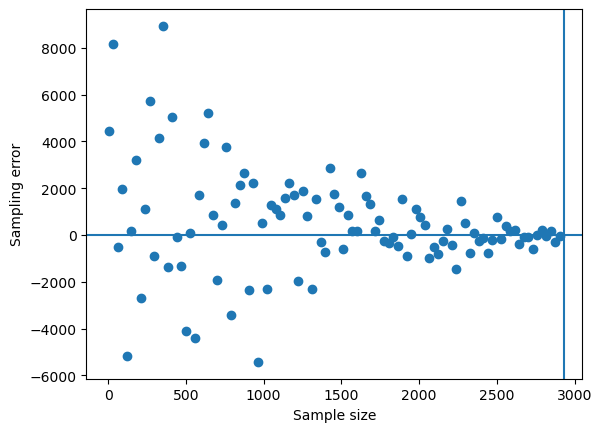

In [5]:
parameter = houses['SalePrice'].mean()
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(101):
    sample = houses['SalePrice'].sample(sample_size , random_state = i)
    statistic = sample.mean()
    sampling_error = parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size += 29
    
import matplotlib.pyplot as plt
plt.scatter(sample_sizes, sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

As seen above, the general tendency for the sampling error is to decrease as the sample size increases. This tendency, however, has exceptions. For instance, there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean μ than large sample sizes (2500 sample points or more) did.

![Smaller samples better](img/s2m1_smaller_samples_better.svg)

For any given sample size, we can have many combinations of values. For instance, for a sample size of 3, we can have many possible combinations of sale prices: [220000, 143000, 281000], [123600, 209500, 202665], [287000, 142500, 440000], etc. Most of the samples of size 3 will give a good estimate of the population mean μ

To prove this point, in the code below we will:

+ Measure the mean for 10000 samples of size 3.
+ Use a histogram to visualize the distribution of the sample means.
+ Draw a vertical line corresponding to the population mean μ

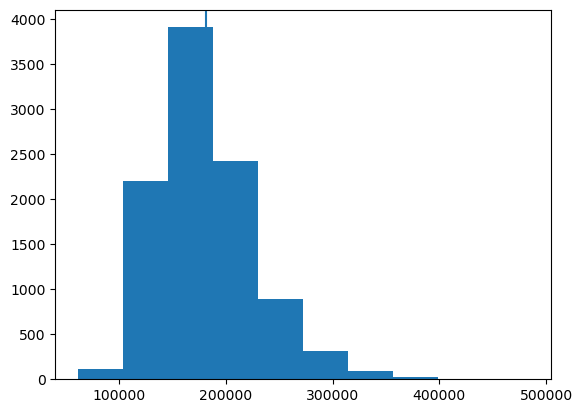

In [6]:
means = []
for i in range(10000):
    sample = houses['SalePrice'].sample(3, random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean())

We can see that most sample means cluster around the population mean. This means that when we take a sample of size 3 and compute ¯x, we have fairly good chances to get a good estimate for the population mean μ. This explains what we've seen in the scatter plot above, where we got good estimates from low-sized samples.

#### Instructions

Take 10000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. For each of the 10000 iterations of a for loop:

+ Use `Series.sample()` to take a sample of size 100 from the SalePrice variable. The random_state parameter is 0 for the first iteration, 1 for the second iteration, 2 for the third iteration, and so on.
+ Compute the mean of the sample.

+ Use `plt.hist()` to generate a histogram to visualize the distribution of sample means.

 + Draw a vertical line for the population mean.
 + Label the x-axis "Sample mean".
 + Label the y-axis "Frequency".
 + Set the range of the x-axis to (0,500000). This is the same range as the histogram we built above has. Can you observe any obvious difference between the two histograms now that we've increased the sample size?


(0.0, 500000.0)

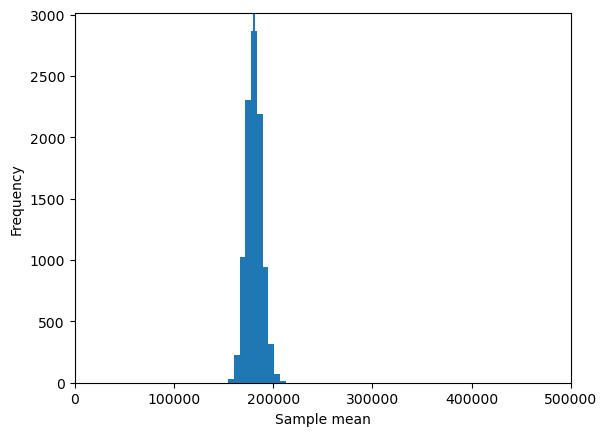

In [7]:
means = []

for i in range(10000):
    sample = houses['SalePrice'].sample(100, random_state=i)
    means.append(sample.mean())
    
plt.hist(means)
plt.axvline(houses['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0,500000)

Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean — the worst sample means we can get are fairly close to the population mean, which is good.

Larger sample sizes are best estimators of population mean

![Variability](img/s2m1_sampling_distros.png)

#### Mean as Unbiased Estimator

For many possible sampling combinations the mean will be the same

When a statistic is on average equal to the parameter it estimates, we call that statistic an unbiased estimator. In our case, the sample mean ¯x is an unbiased estimator for the population mean μ

In [8]:
population = [3, 7, 2]
samples = [[3, 7], [3, 2],
           [7, 2], [7, 3],
           [2, 3], [2, 7]
          ]

sample_means = []
for sample in samples:
    sample_means.append(sum(sample) / len(sample))
    
population_mean = sum(population) / len(population)
mean_of_sample_means = sum(sample_means) / len(sample_means)

unbiased = (population_mean == mean_of_sample_means)

### Weighted Mean

The weighted arithmetic mean is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. The notion of weighted mean plays a role in descriptive statistics and also occurs in a more general form in several other areas of mathematics. 

### Finding Median

+ Find the median value of the TotRms AbvGrd column. [Total rooms above the ground]

+ Sort the values in the column in ascending order.
    
    + Replace the '10 or more' value with the integer 10 using the `Series.replace()` method. We do this only for sorting purposes. To avoid modifying the data in the original data set, make a copy of the column using the `Series.copy()` method and save it to a distinct variable.
    + Convert the column to the int type using the `Series.astype()` method.
    + Sort the values in ascending order using the `Series.sort_values()` method.

+  Depending on whether the distribution has an odd or even number of values, find the median and assign it to a variable named median.


In [10]:
houses['TotRms AbvGrd'].value_counts()

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

In [9]:
houses_new = houses.copy()
houses_new['TotRms AbvGrd'] = houses_new['TotRms AbvGrd'].replace('10 or more', 10)
houses_new['TotRms AbvGrd'] = houses_new['TotRms AbvGrd'].astype('int')
houses_new['TotRms AbvGrd'].sort_values().iloc[1464:1466]
median=6

#### Median a resistant statistic

+ The `Lot Area` and `SalePrice` variables have outliers. Confirm this information by visualizing the distributions using a box plot. Remember from the previous course that outliers will appear as dots on the graph.
    + You can use the `Series.plot.box()` method.
    
+ Compute the median and the mean for each of the two variables.
    + Because the variables are numerical, you can use the `Series.median()` method and the `Series.mean()` method.

+  For each variable, compute the difference between the mean and the median. 
    + Assign the difference for the Lot Area column to a variable named lotarea_difference.
    + Assign the difference for the SalePrice column to a variable named saleprice_difference.
    + Inspect the differences. Do you find the differences large?


<AxesSubplot:>

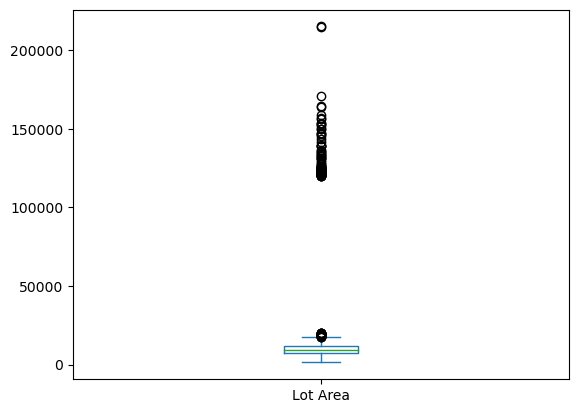

In [11]:
houses['Lot Area'].plot.box()

<AxesSubplot:>

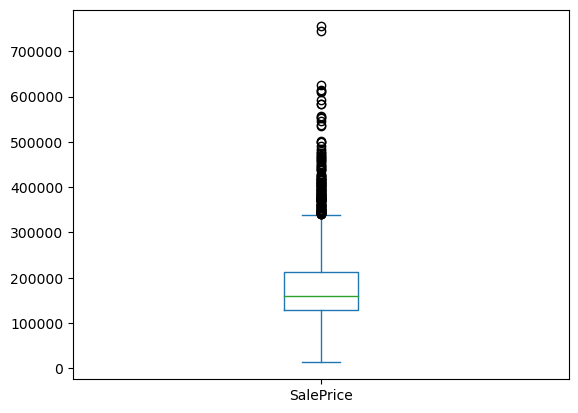

In [12]:
houses['SalePrice'].plot.box()


In [13]:
a= houses['Lot Area'].median()
b=houses['SalePrice'].median()
c=houses['Lot Area'].mean()
d=houses['SalePrice'].mean()
lotarea_difference=c-a
saleprice_difference=d-b

In [14]:
lotarea_difference

3680.7051194539254

In [16]:
saleprice_difference

20796.060068259394